# A sample code

In [7]:
x = 34-23    # A comment
y = "Hello" # Another one
z = 3.45    
if  z == 3.45 or y == "Hello":
     x = x + 1
     y = y + " World"    # String concatenation
print(x)
print(y)

12
Hello World


# String


In [8]:
mystring = "hello" #double quote
print(mystring)
mystring = 'hello' #single quote
print(mystring)


hello
hello


In [9]:
one = 1
two = 2
three = one + two
print(three)

3


In [4]:
hello = "hello"
world = "world"
helloworld = hello + " " + world # the " " to create a space between two word
print(helloworld)

hello world


# Redeclare variable

In [5]:
#Declare variable and initialize it
f = 0
#Re-delcaring the variable works
f = 'guru99'
print(f)

guru99


# Concatenate variable

In [6]:
#Error: differebt types cannot be combined
print("guru"+99)

TypeError: can only concatenate str (not "int") to str

In [10]:
#Fix error by add quote to 99 to make it string
print("guru"+"99")

guru99


# Basic operator

In [11]:
number = 1 + 2 * 3 / 4.0
print(number)

2.5


In [12]:
remainder = 11 % 3
print(remainder)

2


In [13]:
squared = 7 ** 2
cubed = 2 ** 3
print(squared)
print(cubed)

49
8


In [14]:
lotsofhellos = "hello" * 10
print(lotsofhellos)

hellohellohellohellohellohellohellohellohellohello


# Using Operator with Lists

In [15]:
even_numbers = [2,4,6,8]
odd_numbers = [1,3,5,7]
all_number = even_numbers + odd_numbers
print(all_number)

[2, 4, 6, 8, 1, 3, 5, 7]


In [16]:
print([1,2,3] * 3)

[1, 2, 3, 1, 2, 3, 1, 2, 3]


# Iris dataset

In [17]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [18]:
# Load dataset
from sklearn.datasets import load_iris # This will load dataset from sklearn directly


In [19]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names) # arrange data to pandas Dataframe
iris_df['target'] = iris.target
iris_df['target_name'] = iris_df['target'].apply(lambda x : iris.target_names[x])

In [20]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [21]:
#Shape
iris_df.shape

(150, 6)

In [22]:
iris_df.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1

In [23]:
#Class distribution
iris_df.groupby('target_name').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
target_name,,,,,
setosa,50,50,50,50,50
versicolor,50,50,50,50,50
virginica,50,50,50,50,50


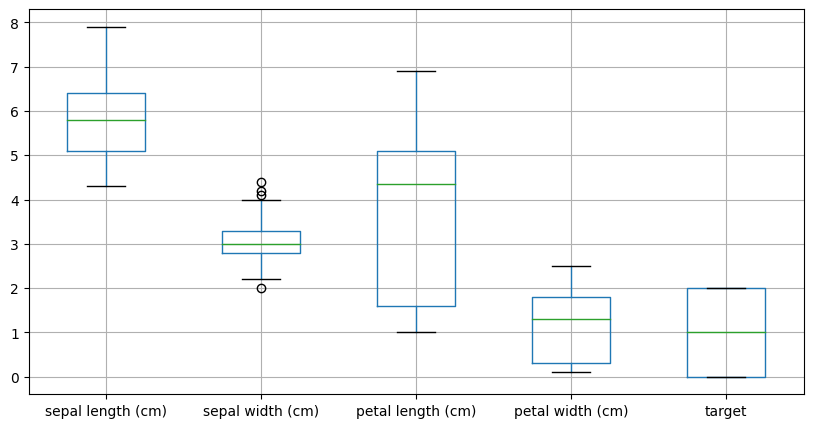

In [24]:
#Box and Whisker plot
iris_df.boxplot(figsize=(10,5))
plt.show()

In [25]:
%matplotlib inline

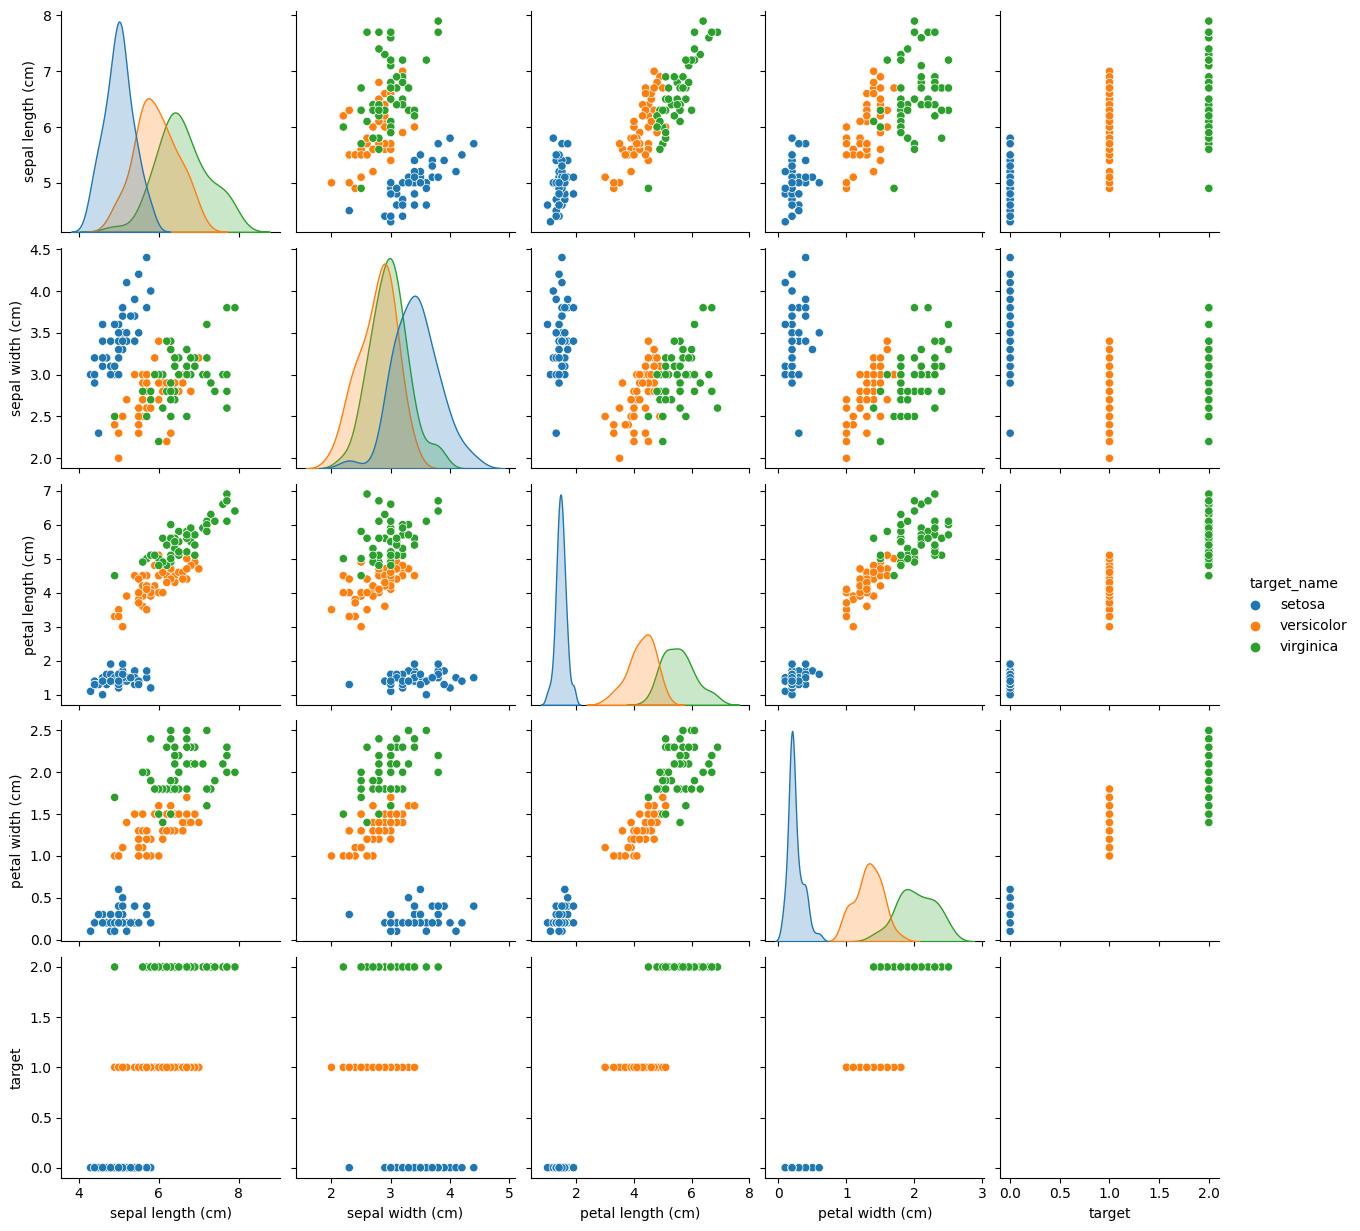

In [29]:
# Here we use searborn package to do density plot. It will provide more information about data than matplotlib
import seaborn as sns
sns.pairplot(iris_df,hue="target_name",diag_kind="kde")

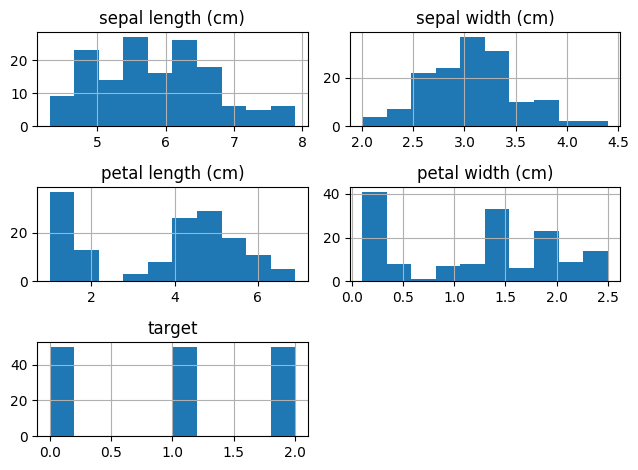

In [30]:
#Histogram
iris_df.hist()
plt.tight_layout()
plt.show()

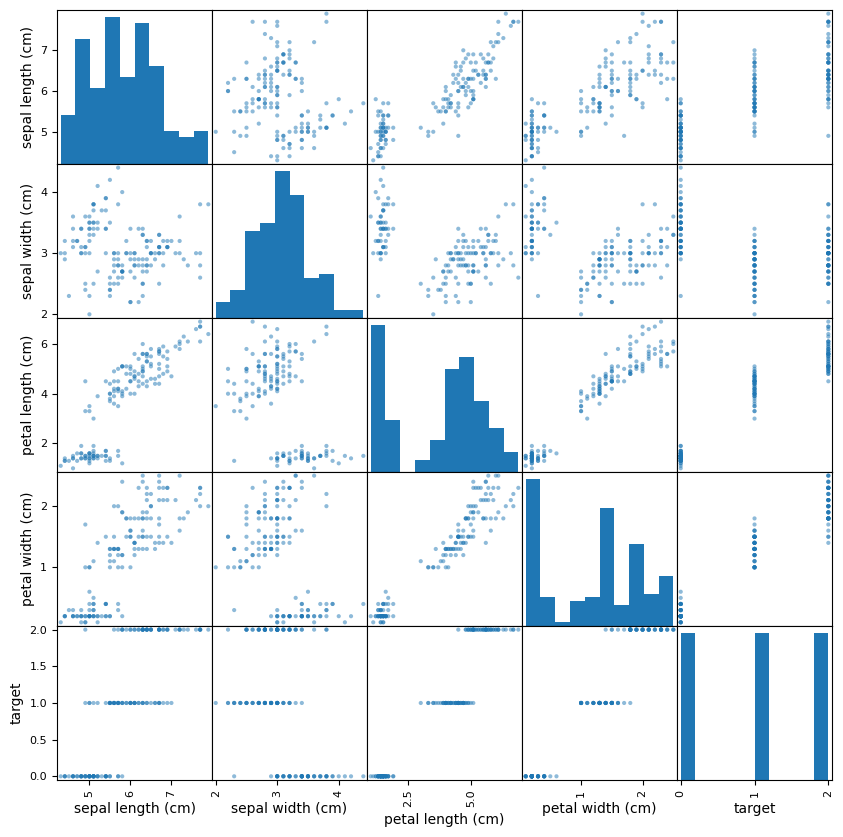

In [31]:
#Scatter plot matrix
scatter_matrix(iris_df,figsize=(10, 10),diagonal='hist')
plt.rcParams.update({'font.size': 10})
plt.show()

# Data preprocessing

**Data Cleaning**

**Data Inspection**

Please check out **Chapter 4 Singular Value Decomposition** at **Multilinear Regression: Example 2** for mor information


# Naive Data preparation with k-fold Cross-Validation

This medthod is **NOT RECOMMENDED** to use so no need to implement it. Please check out the lecture to know more about the logic of method 

# Using Pipeline for Correct Data Preparation

In [258]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std



# Training with model 





**StandardScaler give better result than MinMaxScaler**

In [259]:
X = iris.data #define feature variable
y = iris.target #define target

In [260]:
#Split train test dataset 
#Do not have any recommend setting for split ratio. Here we use 50-50 for better visulizing result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42) 

In [261]:
print(len(X_train)) #120 image will go for training
print(len(X_test)) #30 image will go for testing

75
75


# LogisticRegression model

In [262]:
pipe = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression())]) 
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test) #This evaluation is not reliable since it score model on the same data it trained on (NOT RECOMMENDED)

0.9866666666666667

In [263]:
#define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#evaluate the model using cross-validation
scores = cross_val_score(pipe, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
#report the performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.986 (0.041)


# Suppor Vector Machine


In [264]:
from sklearn.svm import SVC

In [265]:
pipe1 = Pipeline([('scaler', StandardScaler()), ('svc', SVC(probability=True))])
pipe1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(probability=True))])

In [266]:
#define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#evaluate the model using cross-validation
scores = cross_val_score(pipe1, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
#report the performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.986 (0.041)


# K-Neighbor Classifier (KNN)

In [267]:
from sklearn.neighbors import KNeighborsClassifier

In [268]:
pipe2 = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
pipe2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [269]:
#define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#evaluate the model using cross-validation
scores = cross_val_score(pipe2, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
#report the performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.960 (0.072)


# Decision Tree

In [270]:
from sklearn.tree import DecisionTreeClassifier

In [271]:
pipe3 = Pipeline([('scaler', StandardScaler()), ('tree', DecisionTreeClassifier())])
pipe3.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('tree', DecisionTreeClassifier())])

In [272]:
#define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#evaluate the model using cross-validation
scores = cross_val_score(pipe3, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
#report the performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.964 (0.059)


# Random Forest

In [273]:
from sklearn.ensemble import RandomForestClassifier


In [274]:
pipe4 = Pipeline([('scaler', StandardScaler()), ('forest', RandomForestClassifier())])
pipe4.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('forest', RandomForestClassifier())])

In [275]:
#define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#evaluate the model using cross-validation
scores = cross_val_score(pipe4, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
#report the performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.973 (0.055)


# X-Gradient Boost

In [276]:
from xgboost import XGBClassifier

In [277]:
pipe5 = Pipeline([('scaler', MinMaxScaler()), ('xgb', XGBClassifier())])
pipe5.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [278]:
#define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#evaluate the model using cross-validation
scores = cross_val_score(pipe5, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
#report the performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.911 (0.114)


# Confusion Matrix

In [279]:
#Make prediction on test set
y_pred = pipe.predict(X_test) #Logistic regession
y_pred_1 = pipe1.predict(X_test) #Support Vector Machine
y_pred_2 = pipe2.predict(X_test) #KNN
y_pred_3 = pipe3.predict(X_test) #Decision Tree
y_pred_4 = pipe4.predict(X_test) #Random Forest
y_pred_5 = pipe5.predict(X_test) #XGBoost

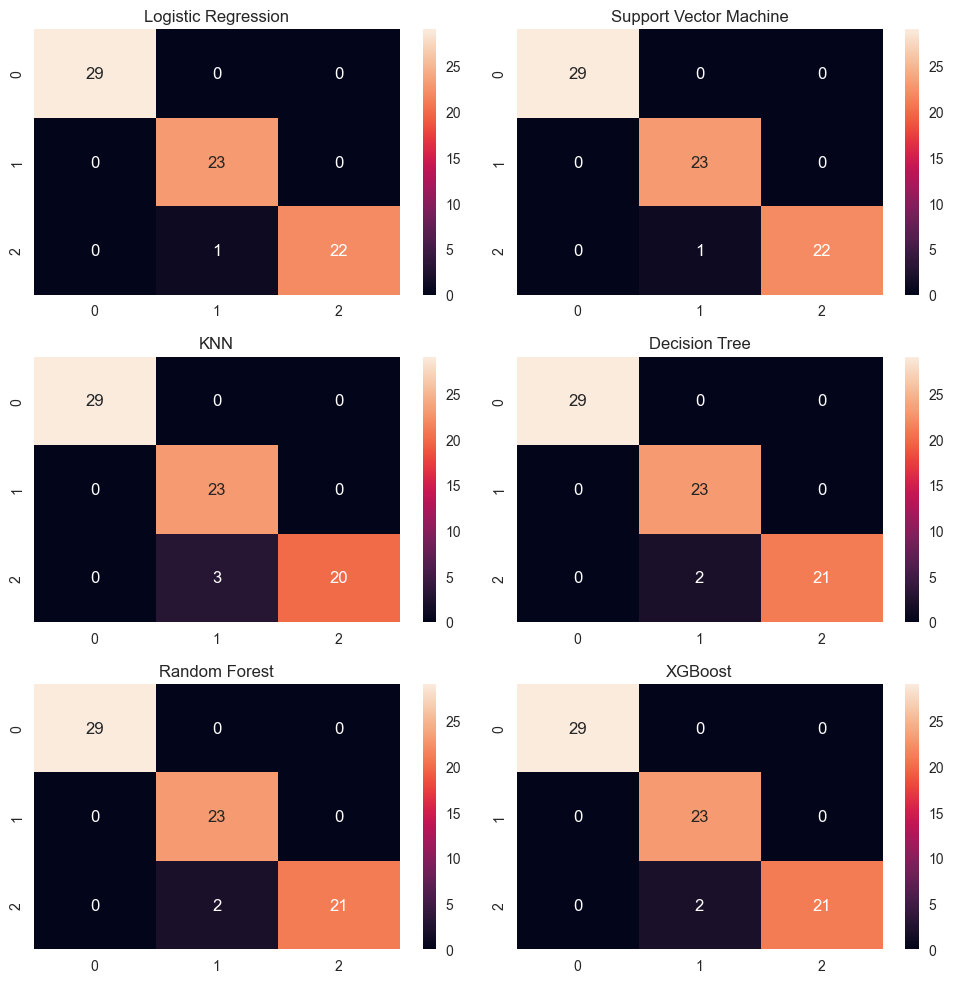

In [280]:
from sklearn.metrics import confusion_matrix
# Create a list of all the predictions
predictions = [y_pred, y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5]

# Create a list of the models' names
model_names = ['Logistic Regression', 'Support Vector Machine', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']

# Create a 3x2 subplot
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs = axs.ravel()

# Iterate through each model and plot its confusion matrix
for i, prediction in enumerate(predictions):
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, ax=axs[i])
    axs[i].set_title(model_names[i])

plt.tight_layout()
plt.show()

# Classification report

In [281]:
from sklearn.metrics import classification_report

In [282]:
print(classification_report(y_test, y_pred_1)) #Change y_pred refer to number of Classifier to see different result

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



# Receiver Operating Characteristic (ROC curve)

In [285]:
#Predict probability for model
y_pred_proba = pipe.predict_proba(X_test)
y_pred1_proba = pipe1.predict_proba(X_test)
y_pred2_proba = pipe2.predict_proba(X_test)
y_pred3_proba = pipe3.predict_proba(X_test)
y_pred4_proba = pipe4.predict_proba(X_test)
y_pred5_proba = pipe5.predict_proba(X_test)

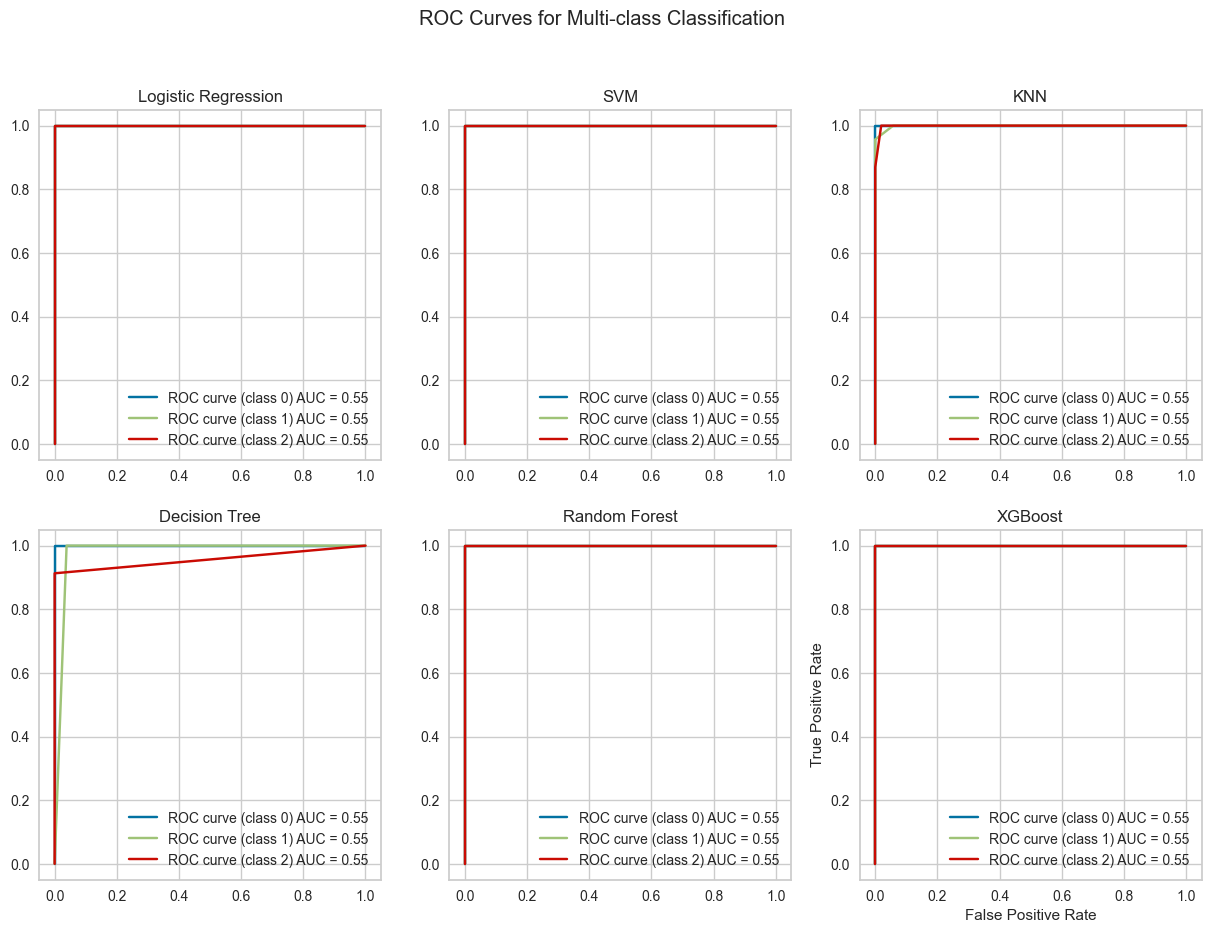

In [307]:
# Create a list to store the models
models = [y_pred_proba, y_pred1_proba, y_pred2_proba, y_pred3_proba, y_pred4_proba, y_pred_proba]

# Create a list to store the names of the models
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']

# Define the figure and the subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the subplots array
axs = axs.ravel()

# Define the labels
labels = np.unique(y_test)

# Fit the models and plot the ROC curves
for i, model in enumerate(models):
    for label in labels:
        fpr, tpr, thresholds = roc_curve(y_test, model[:, label], pos_label=label)
        axs[i].plot(fpr, tpr, label='ROC curve (class %d) AUC = %0.2f' % (label, auc))
    axs[i].set_title(model_names[i])
    axs[i].legend()

# Format the figure
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.suptitle('ROC Curves for Multi-class Classification')
plt.show()